In [1]:
# import relevant packages
import pandas as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt

In [3]:
import sys
print(sys.executable)

/opt/anaconda3/bin/python


In [4]:
df = pd.read_csv("./ratings_clean.csv")
df = df.dropna(subset=['user_id', 'item_id', 'rating', 'title'])
df = df.drop_duplicates(subset=['user_id', 'item_id'])


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 923119 entries, 0 to 1099558
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  923119 non-null  object 
 1   item_id  923119 non-null  object 
 2   rating   923119 non-null  float64
 3   title    923119 non-null  object 
dtypes: float64(1), object(3)
memory usage: 35.2+ MB


In [6]:
df['rating'] = df['rating'].astype(float)
df['item_id'] = df['item_id'].astype(str)
df['user_id'] = df['user_id'].astype(str)


In [7]:
user_counts = df['user_id'].value_counts()
book_counts = df['item_id'].value_counts()
df = df[df['user_id'].isin(user_counts[user_counts >= 5].index)]
df = df[df['item_id'].isin(book_counts[book_counts >= 5].index)]


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 911461 entries, 0 to 1099548
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  911461 non-null  object 
 1   item_id  911461 non-null  object 
 2   rating   911461 non-null  float64
 3   title    911461 non-null  object 
dtypes: float64(1), object(3)
memory usage: 34.8+ MB


In [9]:
df.head()

,user_id,item_id,rating,title
0,A30TK6U7DNS82R,0826414346,5.0,Dr. Seuss: American Icon
1,A2MVUWT453QH61,0826414346,4.0,Dr. Seuss: American Icon
2,A22X4XUPKF66MR,0826414346,4.0,Dr. Seuss: American Icon
3,A2F6NONFUDB6UK,0826414346,4.0,Dr. Seuss: American Icon
4,A14OJS0VWMOSWO,0826414346,5.0,Dr. Seuss: American Icon


In [10]:
# Drop rows where 'Title' is null or empty string
df = df[~(df['title'].isnull() | (df['title'] == ''))].copy()

# Verify that no such rows remain
print(df['title'].isnull().sum())
print((df['title'] == '').sum())

0
0


In [12]:
df.info()
df.tail(10)

<class 'pandas.core.frame.DataFrame'>
Index: 911461 entries, 0 to 1099548
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  911461 non-null  object 
 1   item_id  911461 non-null  object 
 2   rating   911461 non-null  float64
 3   title    911461 non-null  object 
dtypes: float64(1), object(3)
memory usage: 34.8+ MB


,user_id,item_id,rating,title
1099539,A1I2O9Y3X3HXLS,0786182431,5.0,Very Bad Deaths: Library Edition
1099540,A255E1L105V4MU,0786182431,3.0,Very Bad Deaths: Library Edition
1099541,A3GHSD9VY8XS4Q,0786182431,5.0,Very Bad Deaths: Library Edition
1099542,ARN9DDRZCOH5I,0786182431,4.0,Very Bad Deaths: Library Edition
1099543,A1WL0B8Q2XC1TU,0786182431,2.0,Very Bad Deaths: Library Edition
1099544,A1E55W6ES0FY17,0786182431,4.0,Very Bad Deaths: Library Edition
1099545,A2S9T9GB1FIEA,0786182431,5.0,Very Bad Deaths: Library Edition
1099546,AFVQZQ8PW0L,0786182431,5.0,Very Bad Deaths: Library Edition
1099547,A1SXAPEEVNEU42,0786182431,1.0,Very Bad Deaths: Library Edition
1099548,A2PK3NTC9RMEF4,0786182431,3.0,Very Bad Deaths: Library Edition


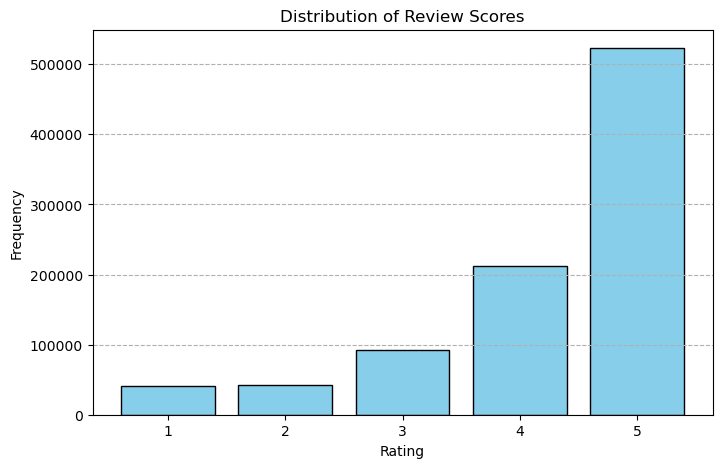

In [13]:
# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(df['rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], color='skyblue', edgecolor='black', rwidth=0.8)
plt.title('Distribution of Review Scores')
plt.xticks([1, 2, 3, 4, 5])
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

In [14]:
mean_score = df['review/score'].mean()
variance_score = df['review/score'].var()
std_score = df['review/score'].std()
median_score = df['review/score'].median()

print("Mean:", mean_score)
print("Variance:", variance_score)
print("Standard Deviation:", std_score)
print("Median:", median_score)

KeyError: 'review/score'

In [15]:
import matplotlib.pyplot as plt

user_review_counts = df['User_id'].value_counts()
plt.figure(figsize=(8, 5))
plt.hist(user_review_counts, bins=20, color='lightgreen', edgecolor='black', log=True)
plt.title('Number of Reviews per User')
plt.xlabel('Reviews per User')
plt.ylabel('Number of Users (log scale)')
plt.grid(axis='y', linestyle='--')
plt.show()


KeyError: 'User_id'

In [16]:
book_review_counts = df['Id'].value_counts()
plt.figure(figsize=(8, 5))
plt.hist(book_review_counts, bins=20, color='lightblue', edgecolor='black', log=True)
plt.title('Number of Reviews per Book')
plt.xlabel('Reviews per Book')
plt.ylabel('Number of Books (log scale)')
plt.grid(axis='y', linestyle='--')
plt.show()


KeyError: 'Id'

In [17]:
top_books = df['Id'].value_counts().head(5)
print("Top 5 books with most reviews:")
print(top_books)

KeyError: 'Id'

In [18]:
least_books = df['Id'].value_counts().tail(5)
print("5 books with least reviews:")
print(least_books)

KeyError: 'Id'

In [19]:
# Top 5
top_book_ids = top_books.index
top_book_titles = df[df['Id'].isin(top_book_ids)][['Id', 'Title']].drop_duplicates()
print(top_book_titles)

print("")
print("")
# Least 5
least_book_ids = least_books.index
least_book_titles = df[df['Id'].isin(least_book_ids)][['Id', 'Title']].drop_duplicates()
print(least_book_titles)


NameError: name 'top_books' is not defined